# P-VALUE

## Background previo

Para entender el concepto de p-value en el ámbito de estadística general, tenemos que entender primero que el el **contraste de hipótesis**

### Contraste de hipótesis

Dentro de la estadística inferencial, un contraste de hipótesis es un procedimiento que nos permite determinar si un estadístico poblacional (media, mediana o el que se quiera tomar) es compatible con lo observado en una muestra de esa población.

Acá vamos a contar con dos hipótesis: $H_0$ y $H_1$

$H_0$ Será nuestra hipótesis nula mientras que $H_1$ será nuestra hipótesis alternativa.

Imaginemos que estamos en un bar tomando un rico vaso de agua en la barra y se acerca un **mago** que intenta realizarnos un truco con una moneda.

Imaginemos que este señor realiza 20 tiradas de la moneda 17 de estos resultados, salen cara.

Acá empezamos a sospechar un poquito sobre la veracidad de la moneda por lo que, como buenos estadísticos, nos disponemos a anotar el espacio muestral de este evento.

Adoptamos la nomenclatura 1, si sale cara y 0 si sale cruz.

S = { 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1 }

Esto, claramente, podemos verlo a través de la intuición y ya sería muy poco probable que esto suceda de forma natural por lo que sospechamos que la moneda está trucada. Pero recurramos a la estadística y al contraste de hipótesis.

Imaginemos que de buena fe, queremos confiar en este mago por lo que nuestra Hipótesis nula será que la moneda no está trucada

$H_0$: La moneda no está trucada o lo que es lo mismo P(1) = 0.5

$H_1$: La moneda está trucada o, lo que es lo mismo P(1) > 0.5

### p-value

El p-value representa una probabilidad por lo que estará dentro del intervalo [0;1]. Es la probabilidad de que un estadístico sea posible dada una $H_0$ verdadera. De forma fácil, le da un valor a nuestra intuición ayudandonos a cuantificar resultados que son debidos al azar de la muestra de resultados que estadísticamente son significativos

Siempre que hablamos de p-value tenemos que tener un nivel de significancia. Es decir, un valor de corte. A partir de que probabilidad puedo decir que el resultado es estadísticamente significativo y rechazar la hipótesis nula

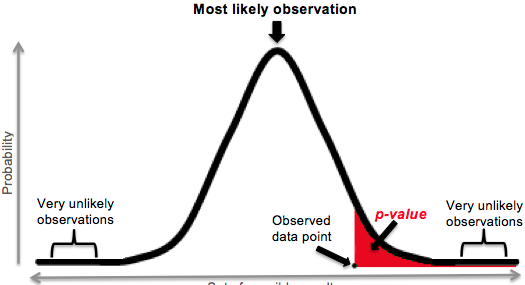

En este caso particular, estamos analizando una distribución normal, pero esto puede aplicarse a cualquier tipo de distribución de densidad de probabilidad. La región roja de la derecha son todos los resultados que nos permiten descartar $H_0$ es decir, es todo el conjunto de p-values menores a nuestro nivel de significancia tomado, lo que se traduce en valores muy poco probables.

Imaginemos que en el problema anterior, tomo un nivel de significancia del 95%, a esto, por convención, se le toma el complemento y se lo asigna con la letra: $\alpha$. En este caso, dado mi nivel de significancia $\alpha = 0.05$. 

Si el resultado obtenido en mi análisis de las monedas, la probabilidad de que eso suceda es menor a 0.05, puedo descartar mi hipótesis nula y considerar mi hipótesis alternativa (**el mago nos cagó**)

Cuanto menor sea el p-value, menor será la probabilidad de obtener ese resultado (tomando $H_0$ como verdadera)

> Observaciones atípicas: Cuando el valor p es menor que $\alpha$ lo más probable es que la hipótesis nula sea falsa pero también es posible que estemos ante una observación atípica. Este tipo de errores puede trabajarse mejorando la calidad de nuestro muestreo o aumentando el tamaño de muestra. Muchos tienden a usar el P99 como valor $\alpha = 0.01$

### Análisis del problema

En el caso particular del mago, nosotros podemos modelar este problema mediante una distribución binomial (https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial)

Y tiene una notación como esta:

$X \sim Bin(n, p) $

Lo que quiere decir es que nuestra variable aleatoria X se distribuye de forma Binomial con parámetros n (cantidad de sucesos) y p, probabilidad de cada suceso

En nuestro caso particular:

$X \sim Bin(20, 0.5) $

Suponemos que la probabilidad de éxito (salga cara) es 0.5 porque es lo que supusimos en nuestra hipótesis nula


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom

In [4]:
# Parámetros de la distribución
n = 20
p = 0.5

In [6]:
x = np.arange(0, n + 1)

In [7]:
binom_dist = binom.pmf(x,n,p)

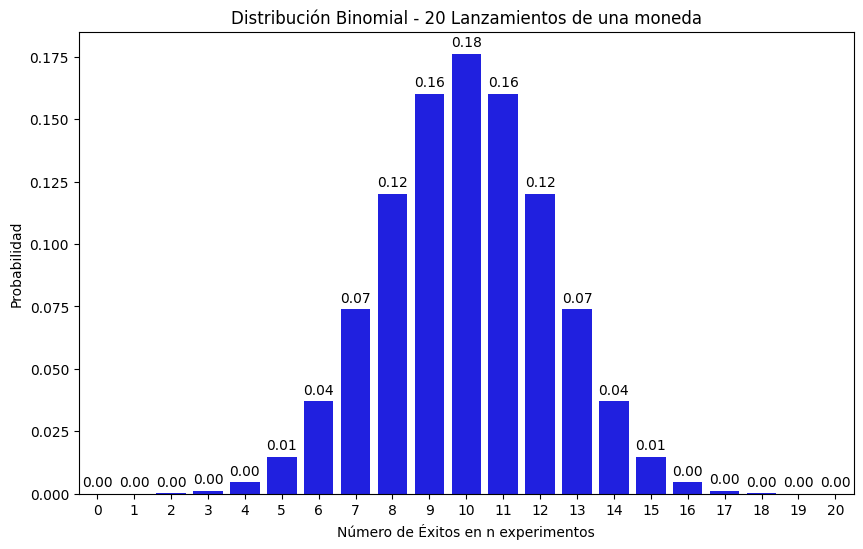

In [13]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=x, y=binom_dist, color='blue')

# Añadir los valores en la parte superior de cada barra
for i in range(len(x)):
    barplot.annotate(format(binom_dist[i], '.2f'),
                     xy=(i, binom_dist[i]),
                     xytext=(0, 3),  # Desplazamiento de los textos
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.title('Distribución Binomial - 20 Lanzamientos de una moneda')
plt.xlabel('Número de Éxitos en n experimentos')
plt.ylabel('Probabilidad')
plt.show()

### p-valor en nuestra muestra

Supongamos que nuestro $\alpha = 0.05$

Esto quiere decir que podemos rechazar la hipótesis nula y asumir que la moneda está trucada (como habiamos supuesto)